<a href="https://colab.research.google.com/github/Navya003/MLP/blob/main/ML_PE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Linear Regression–I (when you have single feature)

In [ ]:
# Imports
# (1) pandas for reading the file
# (2) matplotlib for plotting
# (3) numpy for numerical python: Mathematical functions, arrays

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
wdf = pd.read_csv("WeatherData.csv")
#display(wdf)
wdf.head()

,Temperature(C),Humidity
0,9.472222,0.89
1,9.355556,0.86
2,9.377778,0.89
3,8.288889,0.83
4,8.755556,0.83


In [ ]:
# Renaming the columns
wdf.rename(columns={'Temperature(C)':'temp', 'Humidity':'Humidity'}, inplace=True)
wdf.head()

,temp,Humidity
0,9.472222,0.89
1,9.355556,0.86
2,9.377778,0.89
3,8.288889,0.83
4,8.755556,0.83


Text(0, 0.5, 'Humidity')

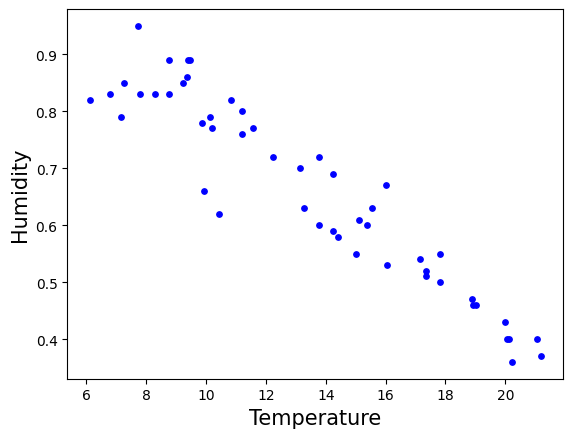

In [ ]:
# Data visualization:
# Check if Linear regression is applicable --> By plotting it

plt.scatter(wdf.temp, wdf.Humidity, s = 15, c = "blue") # scatter Plot --> dots/points
plt.xlabel("Temperature", fontsize=15)
plt.ylabel("Humidity", fontsize=15)
#plt.xticks(fontsize=13, rotation=0)
#plt.yticks(fontsize=13, rotation=0)

In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare data to input as an argument in LinReg model (2d-array)
features_df = wdf[['temp']]
target_val = wdf.Humidity

# Other option for reshaping the data (2 make it 2-d array)
# if the data has only one point --> .reshape(1,-1)
# (1) features_df = wdf[’temp’].values.reshape(-1,1) # --> convert to 2d array
# (2) features_df = pd.DataFrame({’temp’: wdf.temp}) # --> create dataframe
# display(features_df) # finally you can display your data

display(features_df.head())
display(target_val.head())

,temp
0,9.472222
1,9.355556
2,9.377778
3,8.288889
4,8.755556


,Humidity
0,0.89
1,0.86
2,0.89
3,0.83
4,0.83


In [ ]:
 # Previously defined:
#features_df = wdf[['temp']]
#target_val = wdf.Humidity

from sklearn.metrics import mean_absolute_error
# Define the model
# LinearRegression(fit_intercept=True, normalize=False, copy_X=True)
reg_model = LinearRegression()

# fitting
reg_model.fit(features_df, target_val)

# Print fitted parameters
print(f"\nIntercept: {reg_model.intercept_}, coeffecient: {reg_model.coef_}")

# What is the prediction ?
# Note: Make sure ’regressor (feature)’ is again in the dataframe format
prediction = reg_model.predict(wdf[['temp']])
#display(prediction)


# What is the Error?
error = mean_absolute_error(target_val, prediction)
print(f"\nMean Absolute Error = {error}\n")


Intercept: 1.133675735553712, coeffecient: [-0.03522051]

Mean Absolute Error = 0.041421689636499476




Predicted value of Humidity at temp 12.5 [K] is: [0.69341936]

Predicted value of Humidity at temp 12.5 [K] is: 0.6934193572107628


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


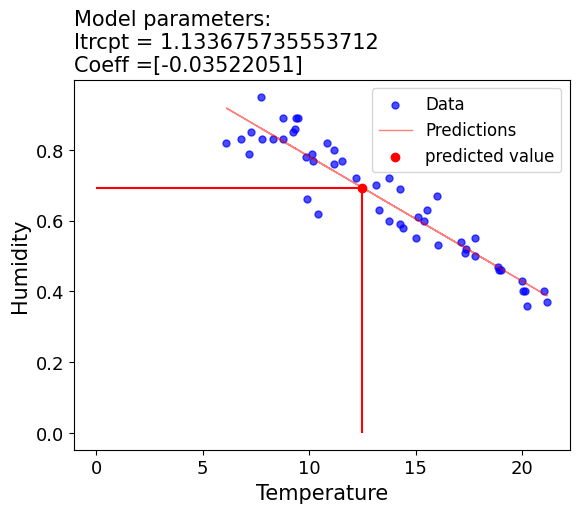

In [ ]:
# How does prediction looks like? Actual Vs prediction
# --> Plot it with the actual data
# Plot options: s = point size, c = point color, alpha = transparency
plt.scatter(wdf.temp, wdf.Humidity, s = 25, c = "blue", alpha = 0.7, label = "Data")
plt.xlabel("Temperature", fontsize=15)
plt.ylabel("Humidity", fontsize=15)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13, rotation=0)
plt.title(f"Model parameters:\nItrcpt = {reg_model.intercept_}\nCoeff ={reg_model.coef_}", loc='left', fontsize=15)

plt.plot(wdf.temp, prediction, c = "red", lw = 1, alpha = 0.5, label = "Predictions")

# Prediction at a given value
temp1 = 12.5
pred1 = reg_model.predict([[temp1]])
print(f"\nPredicted value of Humidity at temp {temp1} [K] is: {pred1}")
print(f"\nPredicted value of Humidity at temp {temp1} [K] is: {pred1[0]}")

plt.scatter(temp1, pred1, color ='r', label = "predicted value")
plt.vlines(x = temp1, ymin = 0.0, ymax = pred1, color = 'r')
plt.hlines(y = pred1, xmin = 0.0, xmax = temp1, color = 'r')
plt.legend(fontsize=12, loc = 0) # loc -> location [0, 10]

## 2 Linear Regression–II (When you have multiple features)

In [ ]:
# Imports
# (1) pandas for reading the file
# (2) matplotlib for plotting
# (3) numpy for numerical python: Mathematical functions, arrays

import pandas as pd
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axis3d
import numpy as np

wdf = pd.read_csv("WeatherDataMultiple.csv")
display(wdf.head())
display(wdf.info())

,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,9.472222,14.1197,1015.13,0.89
1,9.355556,14.2646,1015.63,0.86
2,9.377778,3.9284,1015.94,0.89
3,8.288889,14.1036,1016.41,0.83
4,8.755556,11.0446,1016.51,0.83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature (C)       50 non-null     float64
 1   Wind Speed (km/h)     50 non-null     float64
 2   Pressure (millibars)  50 non-null     float64
 3   Humidity              50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


None

In [ ]:
# Renaming the columns
wdf.rename(columns={'Temperature (C)':'temp', 'Wind Speed (km/h)': 'ws', 'Pressure (millibars)': 'pressure', 'Humidity':'Humidity'},
inplace=True)
wdf.head()

,temp,ws,pressure,Humidity
0,9.472222,14.1197,1015.13,0.89
1,9.355556,14.2646,1015.63,0.86
2,9.377778,3.9284,1015.94,0.89
3,8.288889,14.1036,1016.41,0.83
4,8.755556,11.0446,1016.51,0.83


(array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 [Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9000000000000001, '0.9'),
  Text(0, 1.0, '1.0')])

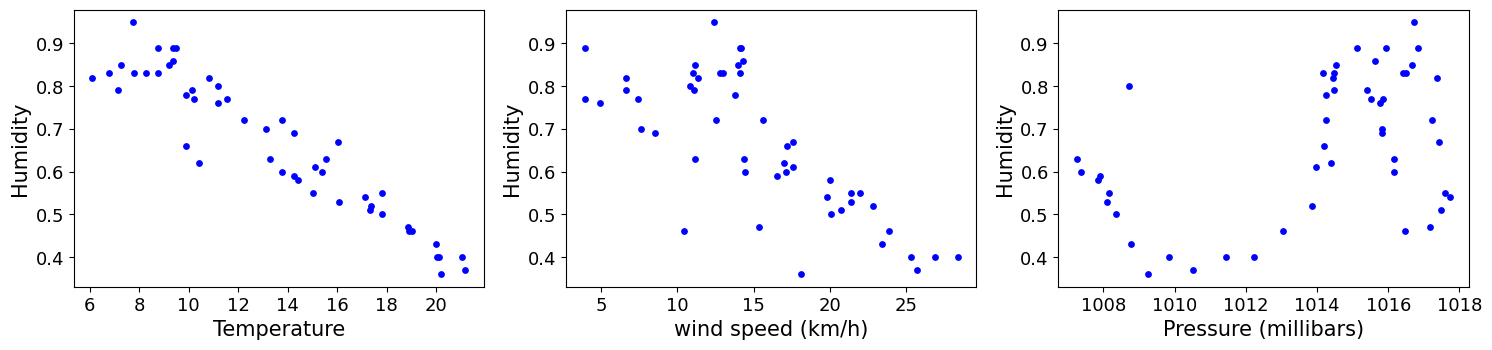

In [ ]:
# Data visualization:
# Check if Linear regression is applicable --> By plotting it

# Plotting
boxsize = 18
f = plt.figure(figsize=(boxsize, 0.20*boxsize))
pt1 = plt.subplot(131) # (121) -> row, column, fig number
plt.scatter(wdf.temp, wdf.Humidity, s = 15, c = "blue") # scatter Plot --> dots/points
plt.xlabel("Temperature", fontsize=15)
plt.ylabel("Humidity", fontsize=15)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13, rotation=0)
pt2 = plt.subplot(132) # (121) -> row, column, fig number
plt.scatter(wdf.ws, wdf.Humidity, s = 15, c = "blue") # scatter Plot --> dots/points
plt.xlabel("wind speed (km/h)", fontsize=15)
plt.ylabel("Humidity", fontsize=15)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13, rotation=0)

pt2 = plt.subplot(133) # (121) -> row, column, fig number
plt.scatter(wdf.pressure, wdf.Humidity, s = 15, c = "blue") # scatter Plot -->dots/points
plt.xlabel("Pressure (millibars)", fontsize=15)
plt.ylabel("Humidity", fontsize=15)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13, rotation=0)

In [ ]:
# Drop the pressure column
# (0) --> row, and (1) --> column
wdf.drop(columns = ['pressure'], axis = 1, inplace=True)
wdf.head()

# Other option for dropping a column
# wdf.drop([’pressure’], axis = 1, inplace=True)
# wdf.pop(’pressure’)
# wdf.head()

,temp,ws,Humidity
0,9.472222,14.1197,0.89
1,9.355556,14.2646,0.86
2,9.377778,3.9284,0.89
3,8.288889,14.1036,0.83
4,8.755556,11.0446,0.83


Text(0.5, 0, 'Humidity')

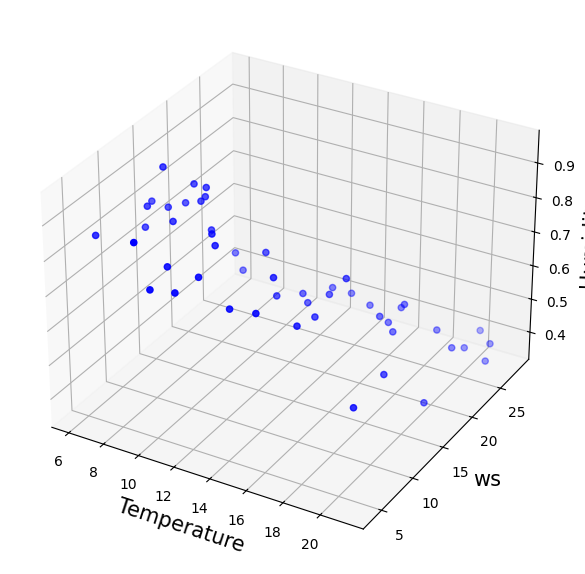

In [ ]:
# Data visualization in 3-d:
boxsize = 18
fig = plt.figure(figsize=(boxsize, 0.40*boxsize))
p1 = fig.add_subplot(111, projection = "3d")
f1 = wdf.temp
f2 = wdf.ws
y = wdf.Humidity
p1.scatter(f1, f2, y, c = "blue", s = 20, marker = "o")
p1.set_xlabel("Temperature", fontsize=15)
p1.set_ylabel("ws", fontsize=15)
p1.set_zlabel("Humidity", fontsize=15)

In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare data to input as an argument in LinReg model (2d-array)
features_df = wdf[['temp', 'ws']]
target_val = wdf.Humidity

# Other option for reshaping the data (2 make it 2-d array)
# if the data has only one point --> .reshape(1,-1)
# (1) features_df = wdf[’temp’].values.reshape(-1,1) # --> convert to 2d array
# (2) features_df = pd.DataFrame({’temp’: wdf.temp}) # --> create dataframe
# display(features_df) # finally you can display your data

display(features_df.head())
display(target_val.head())

,temp,ws
0,9.472222,14.1197
1,9.355556,14.2646
2,9.377778,3.9284
3,8.288889,14.1036
4,8.755556,11.0446


,Humidity
0,0.89
1,0.86
2,0.89
3,0.83
4,0.83


In [ ]:
from sklearn.metrics import mean_absolute_error

# Define the model
# LinearRegression(fit_intercept=True, normalize=False, copy_X=True)
reg_model = LinearRegression()

# fitting
reg_model.fit(features_df, target_val)
# Print fitted parameters
print(f"\nIntercept: {reg_model.intercept_}, coeffecient: {reg_model.coef_}")

# What is the prediction ?
# Note: Make sure ’regressors (features)’ is again in the proper format
temperature = 8
wind_speed = 20
prediction = reg_model.predict([[temperature, wind_speed]])
print(f"\nPredicted Humidity at temp {temperature} [K] and wind speed {wind_speed}[m/h] is: {prediction}")


Intercept: 1.1431751025645598, coeffecient: [-0.03095902 -0.00436079]

Predicted Humidity at temp 8 [K] and wind speed 20[m/h] is: [0.8082871]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


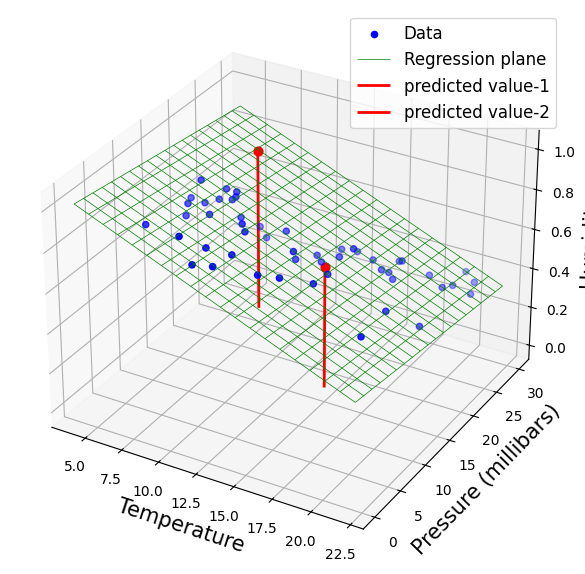

In [ ]:
# Plot data points
boxsize = 18
fig = plt.figure(figsize=(boxsize, 0.40*boxsize))
p1 = fig.add_subplot(111, projection = "3d")

f1 = wdf.temp
f2 = wdf.ws
y = wdf.Humidity

p1.scatter(f1, f2, y, c = "blue", s = 20, marker = "o", label = "Data")
p1.set_xlabel("Temperature", fontsize=15)
p1.set_ylabel("Pressure (millibars)", fontsize=15)
p1.set_zlabel("Humidity", fontsize=15)

# Plot regression plane
# x and y axis (features)
x01 = np.linspace(4, 22, 20) # --> Start, End, No. of points from start to end
x02 = np.linspace(0, 30, 20) # --> Start, End, No. of points from start to end

# Regression model parameters
beta0 = reg_model.intercept_
beta1, beta2 = reg_model.coef_

# Hypothesis
def reg_plane(x1, x2):
  y = reg_model.intercept_ + x1*beta1 + x2*beta2
  return y

# x, y, for plotting a plane
x1, x2 = np.meshgrid(x01, x02) # --> Make mashgrid for 3d plots
y = reg_plane(x1, x2) # --> Corresponding predicted y value (Hypothesis)

# Plot the Regression plane
p1.plot_wireframe(x1, x2, y, color ='green', linewidth = 0.5, label = "Regression plane")

# Visualize a prediction on this plot
t2 = 7
w2 = 25
prediction2 = reg_model.predict([[t2, w2]])
x1_2 = t2
x2_2 = w2
line_pred2 = np.linspace(0, prediction2, 100)
p1.plot_wireframe(x1_2, x2_2, line_pred2, color ='r', linewidth = 2, label ="predicted value-1")
p1.scatter(x1_2, x2_2, prediction2, color ='r', s = 40)
# Visualize another prediction on this plot
t3 = 15
w3 = 15
prediction3 = reg_model.predict([[t3, w3]])

x1_3 = t3
x2_3 = w3
line_pred3 = np.linspace(0, prediction3, 100)
p1.plot_wireframe(x1_3, x2_3, line_pred3, color ='r', linewidth = 2, label ="predicted value-2")
p1.scatter(x1_3, x2_3, prediction3, color ='r', s = 40)
plt.legend(fontsize=12)

## 3 Polynomial Regression (When features x and label y are not linearly related and have nonlinear relation)


In [ ]:
# Imports
# (1) pandas for reading the file
# (2) matplotlib for plotting
# (3) numpy for numerical python: Mathematical functions, arrays

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

wdf = pd.read_csv("WeatherDataPolynomial.csv")
display(wdf.head())
display(wdf.info())

,Pressure (millibars),Humidity
0,1014.40,0.62
1,1014.20,0.66
2,1014.47,0.79
3,1014.45,0.82
4,1014.49,0.83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Pressure (millibars)  25 non-null     float64
 1   Humidity              25 non-null     float64
dtypes: float64(2)
memory usage: 528.0 bytes


None

In [ ]:
# Renaming the columns
wdf.rename(columns={'Pressure (millibars)':'Pressure', 'Humidity':'Humidity'},inplace=True)
wdf.head()

,Pressure,Humidity
0,1014.40,0.62
1,1014.20,0.66
2,1014.47,0.79
3,1014.45,0.82
4,1014.49,0.83


(array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 [Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9000000000000001, '0.9')])

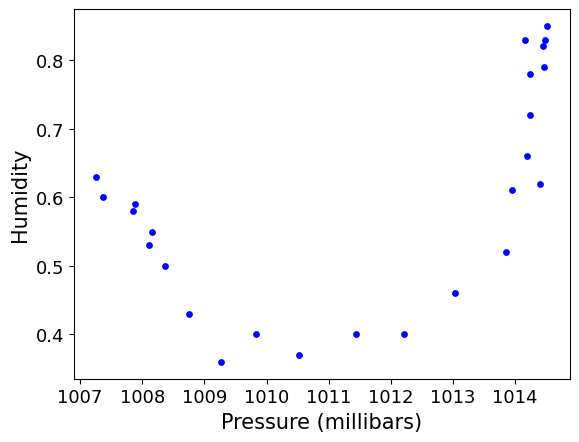

In [ ]:
# Data visualization:
# Check if Linear regression is applicable --> By plotting it

plt.scatter(wdf.Pressure, wdf.Humidity, s = 15, c = "blue") # scatter Plot -->dots/points
plt.xlabel("Pressure (millibars)", fontsize=15)
plt.ylabel("Humidity", fontsize=15)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13, rotation=0)

In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare data to input as an argument in LinReg model (2d-array)
features_df = wdf[['Pressure']]
target_val = wdf.Humidity

display(features_df.head())
display(target_val.head())

,Pressure
0,1014.40
1,1014.20
2,1014.47
3,1014.45
4,1014.49


,Humidity
0,0.62
1,0.66
2,0.79
3,0.82
4,0.83


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

pre_process = PolynomialFeatures(degree = 2)
poly_features_df = pre_process.fit_transform(features_df)

display(features_df)
display(poly_features_df)

,Pressure
0,1014.40
1,1014.20
2,1014.47
3,1014.45
4,1014.49
5,1014.52
6,1014.16
7,1014.24
8,1014.25
9,1013.96


array([[1.00000000e+00, 1.01440000e+03, 1.02900736e+06],
       [1.00000000e+00, 1.01420000e+03, 1.02860164e+06],
       [1.00000000e+00, 1.01447000e+03, 1.02914938e+06],
       [1.00000000e+00, 1.01445000e+03, 1.02910880e+06],
       [1.00000000e+00, 1.01449000e+03, 1.02918996e+06],
       [1.00000000e+00, 1.01452000e+03, 1.02925083e+06],
       [1.00000000e+00, 1.01416000e+03, 1.02852051e+06],
       [1.00000000e+00, 1.01424000e+03, 1.02868278e+06],
       [1.00000000e+00, 1.01425000e+03, 1.02870306e+06],
       [1.00000000e+00, 1.01396000e+03, 1.02811488e+06],
       [1.00000000e+00, 1.01385000e+03, 1.02789182e+06],
       [1.00000000e+00, 1.01304000e+03, 1.02625004e+06],
       [1.00000000e+00, 1.01222000e+03, 1.02458933e+06],
       [1.00000000e+00, 1.01144000e+03, 1.02301087e+06],
       [1.00000000e+00, 1.01052000e+03, 1.02115067e+06],
       [1.00000000e+00, 1.00983000e+03, 1.01975663e+06],
       [1.00000000e+00, 1.00926000e+03, 1.01860575e+06],
       [1.00000000e+00, 1.00876


Intercept: 29167.74604360524, coeffecient: [ 0.00000000e+00 -5.77225454e+01  2.85583573e-02]

Mean Absolute Error = 0.04622925447789603



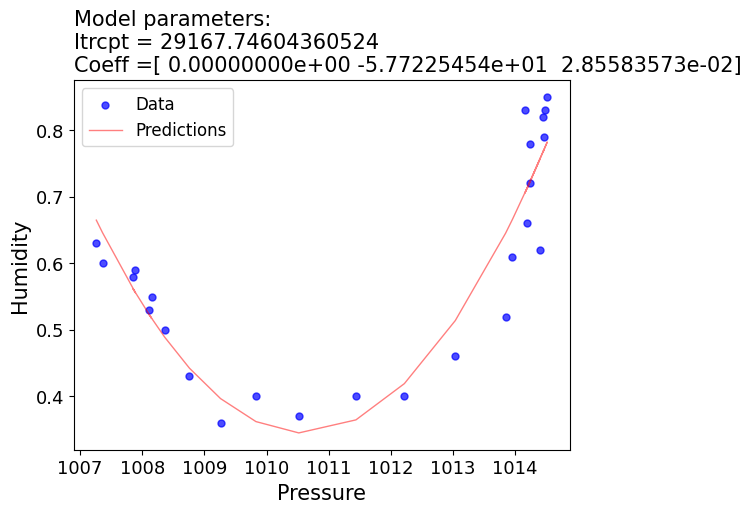

In [ ]:
# Remenber we have preprocessed the data
# poly_features_df = pre_process.fit_transform(features_df)

# Again define the model
reg_model = LinearRegression()

# fitting of pre-processed (polynomial) data
reg_model.fit(poly_features_df, target_val)
# Print fitted parameters
print(f"\nIntercept: {reg_model.intercept_}, coeffecient: {reg_model.coef_}")

# What is the prediction ?
# Remember we have defined out pre-processed features
# poly_features_df = pre_process.fit_transform(features_df)
prediction = reg_model.predict(poly_features_df)
#display(prediction)

# What is the Error?
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(target_val, prediction)
print(f"\nMean Absolute Error = {error}\n")

# How does prediction looks like? Actual Vs prediction
# --> Plot it with the actual data
# Plot options: s = point size, c = point color, alpha = transparency
plt.scatter(wdf.Pressure, wdf.Humidity, s = 25, c = "blue", alpha = 0.7, label ="Data")
plt.xlabel("Pressure", fontsize=15)
plt.ylabel("Humidity", fontsize=15)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13, rotation=0)
plt.title(f"Model parameters:\nItrcpt = {reg_model.intercept_}\nCoeff ={reg_model.coef_}",loc='left', fontsize=15)

plt.plot(wdf.Pressure, prediction, c = "red", lw = 1, alpha = 0.5, label ="Predictions")
plt.legend(fontsize=12, loc = 0) # loc -> location [0, 10]


Predicted value of Humidity at temp 1013.5 [K] is: 0.5839638288707647


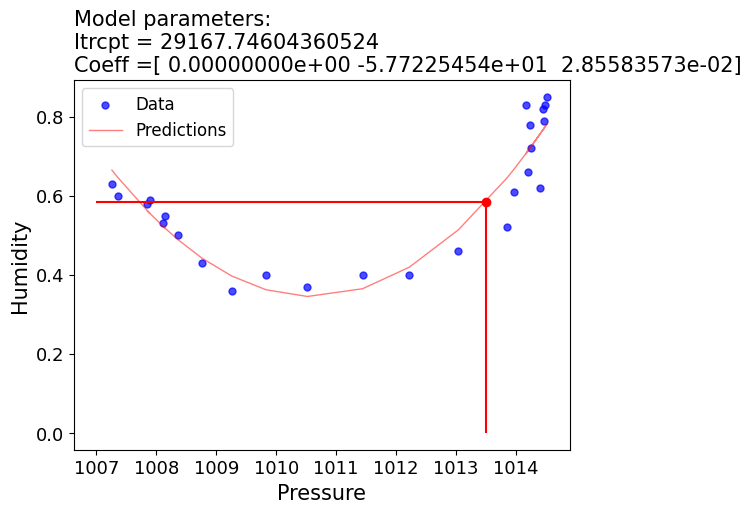

In [ ]:
plt.scatter(wdf.Pressure, wdf.Humidity, s = 25, c = "blue", alpha = 0.7, label =
"Data")
plt.xlabel("Pressure", fontsize=15)
plt.ylabel("Humidity", fontsize=15)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13, rotation=0)
plt.title(f"Model parameters:\nItrcpt = {reg_model.intercept_}\nCoeff ={reg_model.coef_}",loc='left', fontsize=15)
plt.plot(wdf.Pressure, prediction, c = "red", lw = 1, alpha = 0.5, label ="Predictions")
plt.legend(fontsize=12, loc = 0) # loc -> location [0, 10]
# ====================================================================================

# Prediction at a given value
pres1 = 1013.5
# prediction = reg_model.predict([pres1])
# --> DOES NOT WORK: We can’t do prediction
# because we have not pre-processed this data
# Remember how we pre-processed the data:
pred1 = reg_model.predict(pre_process.fit_transform([[pres1]]))

print(f"\nPredicted value of Humidity at temp {pres1} [K] is: {pred1[0]}")
plt.scatter(pres1, pred1, color ='r', label = "predicted value")
plt.vlines(x = pres1, ymin = 0.0, ymax = pred1, color = 'r')
plt.hlines(y = pred1, xmin = 1007.0, xmax = pres1, color = 'r')

Beta 0: 0.011149424819623733
Beta 1: 0.9988430725034663


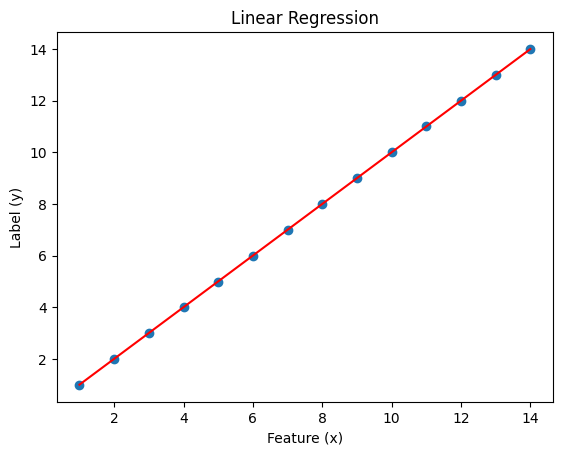

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given data (you can replace this with your actual data)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

# Initialize parameters
beta_0 = 0
beta_1 = 0
alpha = 0.01  # Learning rate

# Number of iterations
num_iterations = 1000

# Gradient descent
for i in range(num_iterations):
    # Calculate predicted values
    y_pred = beta_0 + beta_1 * X

    # Calculate gradients
    dJ_dbeta0 = (1/len(X)) * np.sum(y_pred - y)
    dJ_dbeta1 = (1/len(X)) * np.sum((y_pred - y) * X)

    # Update parameters
    beta_0 -= alpha * dJ_dbeta0
    beta_1 -= alpha * dJ_dbeta1

# Print the final parameters
print("Beta 0:", beta_0)
print("Beta 1:", beta_1)

# Plot the data and the regression line
plt.scatter(X, y)
plt.plot(X, beta_0 + beta_1 * X, color='red')
plt.xlabel('Feature (x)')
plt.ylabel('Label (y)')
plt.title('Linear Regression')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

# Load the data
df = pd.read_csv('ML1L-FinalData23.csv')


# (a) Print last 5 rows
print(df.tail(5))

# (b) Plot the data
plt.scatter(df['Temperature'], df['Humidity'])
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Temperature vs Humidity')
plt.show()

# (c) Identify features not suitable for linear regression
#   - Categorical features
#   - Features with non-linear relationships with the target variable

# (a) Drop the feature(s) not suitable for linear regression
#   - Assuming 'Temperature' is the only suitable feature
X = df[['Temperature']]
y = df['Humidity']

# (b) Create polynomial features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Create and train the model
model = LinearRegression()
model.fit(X_poly, y)

# (c) Print model coefficients, intercept, and error
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean Squared Error:', mean_squared_error(y, model.predict(X_poly)))

# (a) Predict 'y' for x = 1013.5
x_new = np.array([[1013.5]])
x_new_poly = poly.transform(x_new)
y_pred = model.predict(x_new_poly)
print('Predicted Humidity for Temperature 1013.5:', y_pred)

# (b) Plot predicted value, training data, and predictions
plt.scatter(X, y, label='Training Data')
plt.scatter(x_new, y_pred, color='red', label='Predicted Value')
plt.plot(X, model.predict(X_poly), color='green', label='Regression Curve')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Temperature vs Humidity with Prediction')
plt.legend()
plt.show()

In [ ]:
def gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)

    for i in range(num_iterations):
      y_pred = np.dot(X, theta)
        error = y_pred - y
        gradient = (1/m) * np.dot(X.T, error)
        theta -= learning_rate * gradient

    return theta

# Train the model using gradient descent
theta = gradient_descent(X, y)

# Print the coefficients
print('Coefficients from gradient descent:', theta)
